In [47]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic.csv')

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()

In [50]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-53-56fcf1da86a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


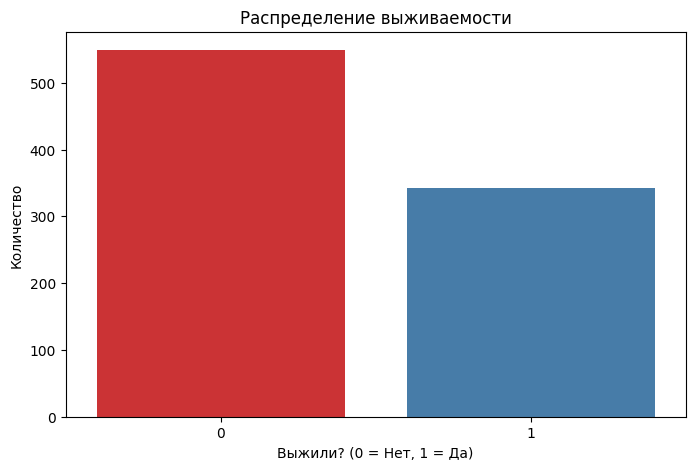

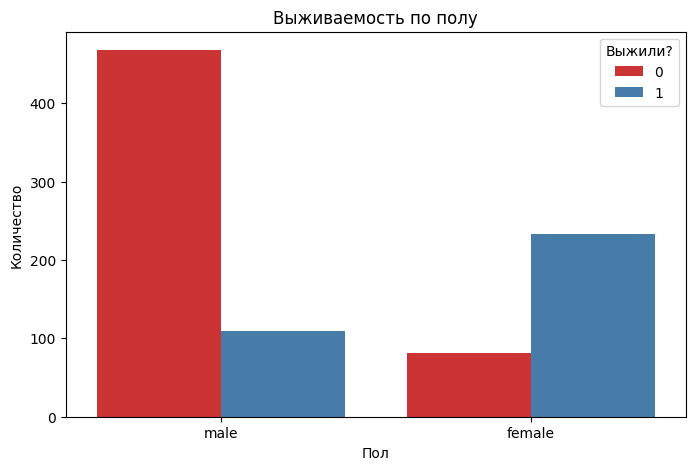

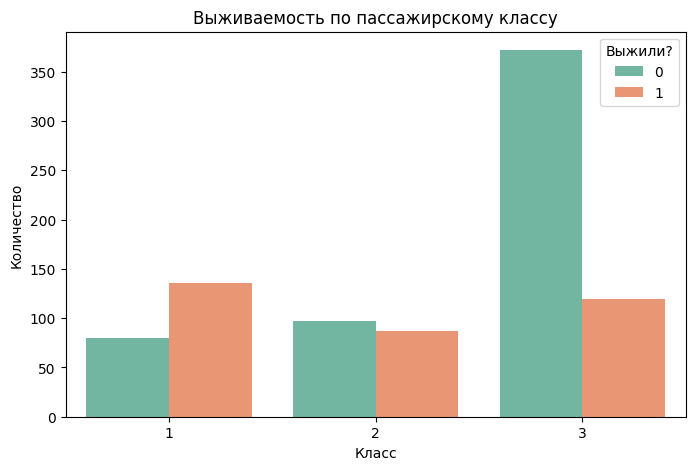

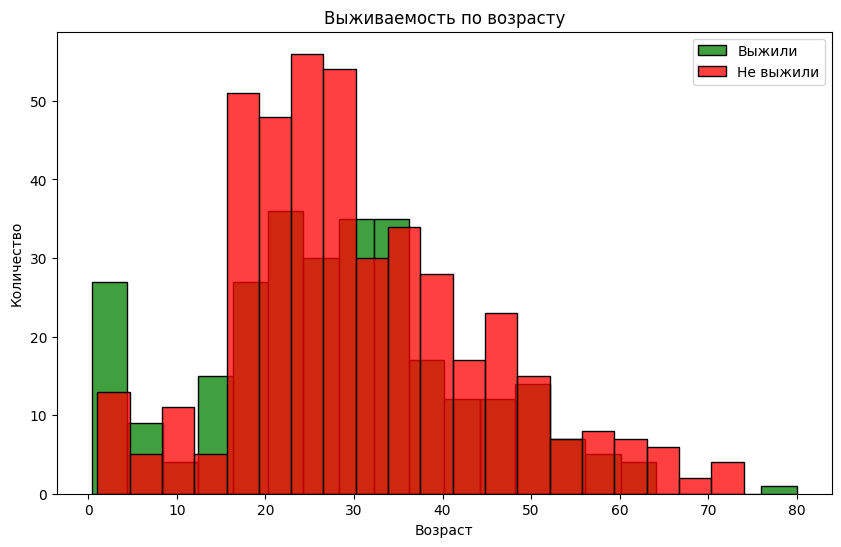

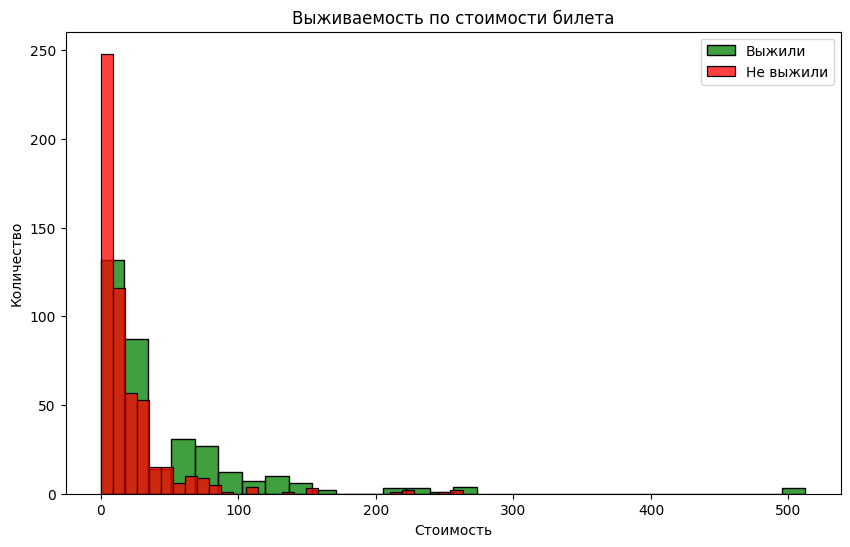

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Распределение выживаемости')
plt.xlabel('Выжили? (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Выживаемость по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Выжили?', loc='upper right')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Выживаемость по пассажирскому классу')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Выжили?', loc='upper right')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df[df['Survived'] == 1]['Age'].dropna(), bins=20, label='Выжили', color='green', kde=False)
sns.histplot(df[df['Survived'] == 0]['Age'].dropna(), bins=20, label='Не выжили', color='red', kde=False)
plt.title('Выживаемость по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Fare'], bins=30, label='Выжили', color='green', kde=False)
sns.histplot(df[df['Survived'] == 0]['Fare'], bins=30, label='Не выжили', color='red', kde=False)
plt.title('Выживаемость по стоимости билета')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.legend()
plt.show()

Анализ графиков:
1. **Количество выживших**. Во время трагедии выжило меньше людей, чем погибло.
2. **Выживаемость по полу**. На борту было больше мужчин, но большинство из них погибло. Женщины показали большую выживаемость, чем мужчины.
3. **Выживаемость по пассажирскому классу**. Людей, купивших билет в третьем классе, погибло больше, чем выжило. Первый и второй классы показали более усреднённую статистику по выживанию и смерти, однако в первом классе выжило больше людей.
4. **Выживаемость по возрасту**. Больше всего погибло людей от 15 до 40 лет. Большинство выживших - дети раннего возраста и люди от 15 до ~35 лет. Из этого можно предположить, что в приоритете спасали детей. Возможно вместе с детьми выжили люди, помогавшие им, но это не факт.
5. **Выживаемость по стоимости билета**. Чем дешевле билет, тем меньше выживаемость, но с увеличением стоимости шанс на выживание возрастает.

In [54]:
catregorical_cols= df.select_dtypes(include=['object']).columns
label_encoders ={}

In [55]:
from sklearn.preprocessing import LabelEncoder

for col in catregorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [56]:
catregorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [59]:
df['Age'].fillna(df['Age'].median(),inplace=True)


<ipython-input-59-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [60]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


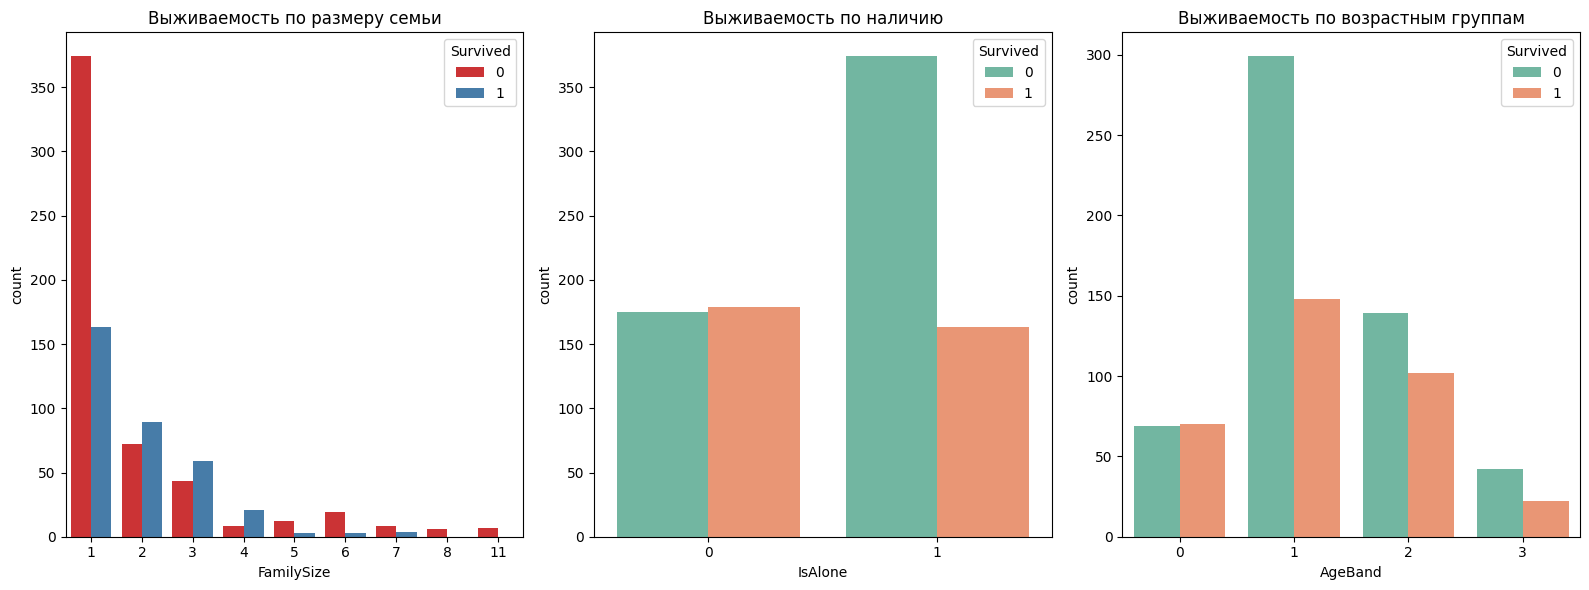

In [71]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Одинокие люди
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Возрастные группы
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=[0, 1, 2, 3])

fig, axs = plt.subplots(1, 3, figsize=(16, 6))

sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Set1', ax=axs[0])
axs[0].set_title('Выживаемость по размеру семьи')

sns.countplot(x='IsAlone', hue='Survived', data=df, palette='Set2', ax=axs[1])
axs[1].set_title('Выживаемость по наличию')

sns.countplot(x='AgeBand', hue='Survived', data=df, palette='Set2', ax=axs[2])
axs[2].set_title('Выживаемость по возрастным группам')

plt.tight_layout()
plt.show()

In [72]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsAlone', 'FamilySize','Sex','AgeBand']
X = df[features]
y = df['Survived']

In [73]:
X

,Pclass,Age,SibSp,Parch,Fare,IsAlone,FamilySize,Sex,AgeBand
0,3,22.0,1,0,7.2500,0,2,1,1
1,1,38.0,1,0,71.2833,0,2,0,2
2,3,26.0,0,0,7.9250,1,1,0,1
3,1,35.0,1,0,53.1000,0,2,0,2
4,3,35.0,0,0,8.0500,1,1,1,2
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,1,1
887,1,19.0,0,0,30.0000,1,1,0,1
888,3,28.0,1,2,23.4500,0,4,0,1
889,1,26.0,0,0,30.0000,1,1,1,1


In [74]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.078)))
model.add(Dropout(0.059))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6972 - loss: 1.7898 - val_accuracy: 0.8042 - val_loss: 1.5621
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7575 - loss: 1.5521 - val_accuracy: 0.8252 - val_loss: 1.3298
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 1.3245 - val_accuracy: 0.8322 - val_loss: 1.1495
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7796 - loss: 1.1735 - val_accuracy: 0.8322 - val_loss: 1.0123
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961 - loss: 1.0446 - val_accuracy: 0.8252 - val_loss: 0.8986
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8053 - loss: 0.9202 - val_accuracy: 0.8392 - val_loss: 0.8096
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7992 - loss: 0.8414 - val_accuracy: 0.8392 - val_loss: 0.7359
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7933 - loss: 0.7642 - val_accuracy: 0.8322 - val_loss

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8287 - loss: 0.5986 - val_accuracy: 0.8252 - val_loss: 0.5584
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8093 - loss: 0.5864 - val_accuracy: 0.8252 - val_loss: 0.5312
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8089 - loss: 0.5807 - val_accuracy: 0.8252 - val_loss: 0.5112
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8310 - loss: 0.5149 - val_accuracy: 0.8182 - val_loss: 0.4946
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8127 - loss: 0.5235 - val_accuracy: 0.8252 - val_loss: 0.4761
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8486 - loss: 0.4853 - val_accuracy: 0.8182 - val_loss: 0.4693
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8181 - loss: 0.4913 - val_accuracy: 0.8182 - val_loss: 0.4622
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8575 - loss: 0.4425 - val_accuracy: 0.8252 - val_loss:

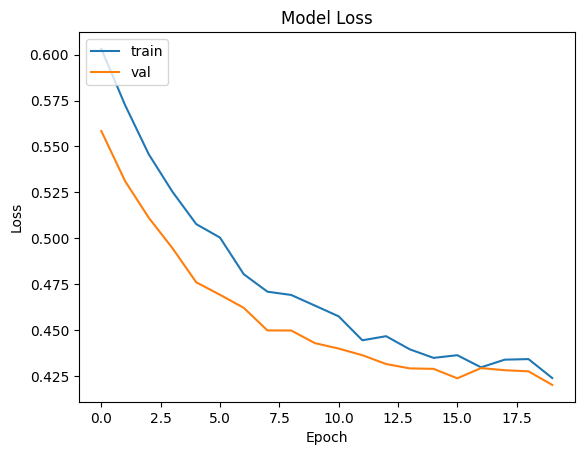

In [76]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
